# Wie divers ist die Oper in NRW?

Wir haben per Umfrage die Spielpläne aller 13 kommunalen Bühnen in NRW mit Opern im Programm abgefragt und analysiert. Teilweise wurden Daten händisch nachgetragen und bereinigt: [opern_nrw_18_19.csv]('https://raw.githubusercontent.com/wdr-data/starter/main/content/stories/19-06-27_oper/data/opern_nrw_18_19.csv')

Im zweiten Schritt haben wir eine Liste von 40.000 KomponistInnen aus WikiData abgerufen und diese mit unseren Opern-Daten verschnitten, um Geburts- und Sterbejahr und Geschlecht zuzuordnen: [komponisten.wikidata.csv]('https://raw.githubusercontent.com/wdr-data/starter/main/content/stories/19-06-27_oper/data/komponisten.csv')


Falls Ihnen Fehler in den Daten auffallen oder sie uns eine Nachricht schicken möchten, schreiben sie gerne an data@wdr.de.

In [1]:
# Pakete laden 

import pandas as pd
import wptools
import wikidata
import wikipedia
import numpy as np
import requests
import json

import matplotlib.pyplot as plt
import seaborn

pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 1000

from IPython.display import IFrame 

%matplotlib inline 

In [2]:
# Daten einlesen 

df = pd.read_csv('opern_nrw_18_19.csv')

In [3]:
# Zufällige Zeile aus dem Datensatz ansehen

df.sample()

,Spielstätte,Ort,Titel,Anzahl,Komponist,Komponist_ber,Geburtsort,Geschlecht,Geburtsdatum,Geburtsjahr,Alter,Sterbedatum,Verstorben,Art,Bemerkung
114,Theater Krefeld Mönchengladbach,Krefeld/Mönchengladbach,Nabucco,7,Giuseppe Verdi,Giuseppe Verdi,Le Roncole,männlich,1813-10-10 00:00:00+00:00,1813,206,1901,Tot,wiederaufnahmen,NaN


In [4]:
# Wie groß ist der Datensatz?

df.shape

(159, 15)

In [5]:
# Welche Spalten gibt es?

df.columns

Index(['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsdatum', 'Geburtsjahr', 'Alter',
       'Sterbedatum', 'Verstorben', 'Art', 'Bemerkung'],
      dtype='object')

In [6]:
# Spalten auswählen

df = df[['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsjahr', 'Alter',
       'Sterbedatum', 'Verstorben', 'Art', 'Bemerkung']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 14 columns):
Spielstätte      159 non-null object
Ort              159 non-null object
Titel            159 non-null object
Anzahl           159 non-null int64
Komponist        146 non-null object
Komponist_ber    159 non-null object
Geburtsort       158 non-null object
Geschlecht       159 non-null object
Geburtsjahr      159 non-null int64
Alter            159 non-null int64
Sterbedatum      159 non-null int64
Verstorben       159 non-null object
Art              159 non-null object
Bemerkung        17 non-null object
dtypes: int64(4), object(10)
memory usage: 17.5+ KB


## Ouvertüre
Vorweg: Wir jammern auf hohem Niveau. Denn alles in allem steht es gut um die Oper in Nordrhein-Westfalen. In der letzten Spielzeit stemmten die **13 kommunalen Bühnen** über **hundert Inszenierungen** – mit insgesamt **mehr als tausend Aufführungen**. In anderen Worten: Opernfreunde hatten im Schnitt jeden Tag die Wahl zwischen **rund drei Opernaufführungen**.

In [8]:
# Gesamtsumme der Aufführungen 

df.Anzahl.sum()

1024

In [9]:
# Anzahl der verschiedenen gespielten Opern

len(df.Titel.unique())

115

In [25]:
# Anzahl der Spielstätten
len(df.Spielstätte.unique())

13

In [26]:
df.Anzahl.sum() / 365

2.8054794520547945

## Introduktion


### Ältere werden häufiger aufgeführt
Während lebende KomponistInnen oft nur 1-8 mal aufgeführt werden, werden Komponisten, die über 150 Jahre alt sind besonders häufig aufgeführt. Spitzenreiter sind Guiseppe Verdi und Wolfgang Amadeus Mozart.

In [44]:
# Spalten auswählen 
age_vs_anzahl = df[['Komponist_ber', 'Geburtsjahr', 'Anzahl', 'Verstorben']]

In [56]:
# Daten sortieren anhand Anzahl, Geburtsjahr, Verstorben
age_vs_anzahl = age_vs_anzahl.pivot_table(values=['Anzahl', 'Geburtsjahr', 'Verstorben'], index='Komponist_ber', aggfunc={'Anzahl': 'sum', 'Geburtsjahr': 'min', 'Verstorben': 'min'})

In [57]:
# Anzeigen
age_vs_anzahl.sort_values(by='Anzahl', ascending=False).head()

,Anzahl,Geburtsjahr,Verstorben
Komponist_ber,,,
Giuseppe Verdi,143,1813,Tot
Wolfgang Amadeus Mozart,118,1756,Tot
Richard Wagner,68,1813,Tot
Jacques Offenbach,59,1819,Tot
Giacomo Puccini,43,1858,Tot


In [59]:
# Als .csv speichern, zur Weiterverarbeitung im Datawrapper 
# age_vs_anzahl.to_csv('./csv/age_vs_anzahl.csv')

In [60]:
# iFrame der fertigen Grafik 
IFrame('//datawrapper.dwcdn.net/48hJE/11/', width='320', height='400')

Zu sehen ist das Geburtsjahr im Verhältnis zur Zahl der Aufführungen. Gelbe Quadrate stehen für lebende    KomponistInnen, blaue Punkte für verstorbene. Klicken Sie darauf, um Name, Geburtsjahr und Zahl der Aufführungen zu sehen.

### Älteste, Jüngste, Meistgespielt

Zum Beispiel: Claudio Monteverdi war mit 425 Jahren der älteste gespielte Komponist 2018/19. Leonard Evers mit 34 der jüngste. Bei Leonard Bernstein und Jacques Offenbach sieht man, dass die großen Jubiläumsjahre sehr erfolgreich darin waren, die Komponisten wieder auf die Spielpläne zu setzen.

Giuseppe Verdi führt die Liste mit Abstand an – er ist in der letzten Spielzeit gleich 13 mal in NRW inszeniert worden.

In [72]:
df.sort_values(by='Alter', ascending=False).head(1)

,Spielstätte,Ort,Titel,Anzahl,Komponist,Komponist_ber,Geburtsort,Geschlecht,Geburtsjahr,Alter,Sterbedatum,Verstorben,Art,Bemerkung
157,Theater Hagen,Hagen,Combattimento di Trancredi e Clorinda,4,Claudio Monteverdi,Claudio Monteverdi,Cremona,männlich,1567,452,1643,Tot,premieren,NaN


In [73]:
df.sort_values(by='Alter', ascending=True).head(1)

,Spielstätte,Ort,Titel,Anzahl,Komponist,Komponist_ber,Geburtsort,Geschlecht,Geburtsjahr,Alter,Sterbedatum,Verstorben,Art,Bemerkung
0,Deutsche Oper am Rhein,Düsseldorf/Duisburg,Gold!,7,NaN,Leonard Evers,Heerlen,männlich,1985,34,0,lebt,sonstiges,Premiere oder Wiederaufnahme?


In [74]:
len(set(df[df.Komponist_ber == 'Giuseppe Verdi'].Titel))

13

In [75]:
set(df[df.Komponist_ber == 'Giuseppe Verdi'].Titel)

{'Aida',
 'Die sizilianische Vesper',
 'Don Carlo',
 'Falstaff',
 'Jérusalem',
 'La Traviata',
 'La forza del destino',
 'Luisa Miller',
 'Nabucco',
 'Otello',
 'Rigoletto',
 'Simon Boccanegra',
 'Viva Verdi'}

### Im Schnitt 180 Jahre alt

In [80]:
composers_age = df[['Komponist_ber', 'Alter']]
composer_age = composers_age[composers_age.Alter.notnull()]
composers_age.Alter.median()

181.0

In [81]:
composers_age.Alter.mean()

175.88050314465409

In [82]:
composers_age.Alter.mode()

0    206
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d5f979940>]],
      dtype=object)

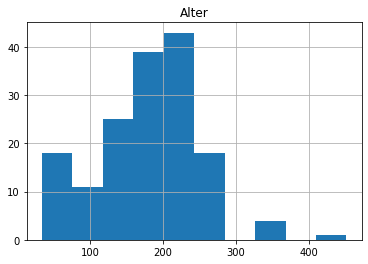

In [79]:
composers_age.hist()

### Lebend / Verstorben
Nur 17 der 66 gespielten Komponisten leben noch, das sind 27 Prozent. Schaut man allerdings auf die Gesamtanzahl aller gespielten Aufführungen, dann liegen die lebeden Komponisten bei nur noch 9 Prozent. Ist die Opernwelt im 19. Jahrhundert stehen geblieben?

In [166]:
composers = df[['Titel', 'Komponist_ber', 'Anzahl']]
len(set(composers.Komponist_ber))

66

In [170]:
# Anteil lebend / verstorben Anzeigen
composers_alive = df[['Komponist_ber', 'Verstorben']]
alive = composers_alive[composers_alive.Verstorben == 'lebt']
composers_alive = composers_alive.drop_duplicates()
composers_alive = composers_alive.groupby('Verstorben').count()
composers_alive

,Komponist_ber
Verstorben,
Tot,49
lebt,17


In [171]:
# Prozente berechnen
composers_alive['%']= composers_alive.Komponist_ber.apply(lambda x: round(x / composers_alive.Komponist_ber.sum() * 100))
composers_alive

,Komponist_ber,%
Verstorben,,
Tot,49,74.0
lebt,17,26.0


In [173]:
# Anteil lebend / verstorben an Aufführungen berechnen 
composers_anzahl_verstorben = df[['Komponist_ber', 'Verstorben', 'Anzahl']]
composers_anzahl_verstorben = composers_anzahl_verstorben.groupby('Verstorben').sum()
composers_anzahl_verstorben

,Anzahl
Verstorben,
Tot,929
lebt,95


In [175]:
# Prozente berechnen 
composers_anzahl_verstorben['%'] = composers_anzahl_verstorben.Anzahl.apply(lambda x: round(x / composers_anzahl_verstorben.Anzahl.sum() * 100))
composers_anzahl_verstorben

,Anzahl,%
Verstorben,,
Tot,929,91.0
lebt,95,9.0


In [176]:
# iFrame der fertigen Grafik 
IFrame('//datawrapper.dwcdn.net/6D2bM/4/', width='320', height='303')

### Nuria Núñez Hierro ist die einzige Frau

In [184]:
gender = df[['Komponist_ber', 'Geschlecht']]

In [185]:
gender = gender.drop_duplicates()

In [186]:
gender = gender.groupby('Geschlecht').count()
gender

,Komponist_ber
Geschlecht,
männlich,65
weiblich,1


In [192]:
gender_anzahl = df[['Komponist_ber', 'Geschlecht', 'Anzahl']]
gender_anzahl = gender_anzahl.groupby('Geschlecht').sum()
gender_anzahl

,Anzahl
Geschlecht,
männlich,1016
weiblich,8


In [203]:
# Prozent berechnen 
round((8/1024)*100)

1

In [204]:
# Prozent berechnen 
round((1016/1024)*100)

99

In [205]:
# iFrame der fertigen Grafik 
IFrame('//datawrapper.dwcdn.net/T56o1/2/', width='320', height='316')

### Herkunft 
Beim Blick auf die Herkunft der KomponistInnen liegt das Zentrum weiterhin klar in Europa.

In [206]:
df.columns

Index(['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsjahr', 'Alter', 'Sterbedatum',
       'Verstorben', 'Art', 'Bemerkung'],
      dtype='object')

In [211]:
herkunft = df[['Komponist_ber', 'Geburtsort']]
herkunft.sample()

,Komponist_ber,Geburtsort
20,Aribert Reimann,Berlin


In [212]:
herkunft.shape

(159, 2)

In [214]:
herkunft = herkunft.drop_duplicates()

In [215]:
herkunft.shape

(66, 2)

In [216]:
herkunft.to_clipboard()

In [ ]:
-------------------------------------------------

### Häuser und Anzahl der Aufführungen

In [10]:
df.columns

Index(['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsjahr', 'Alter', 'Sterbedatum',
       'Verstorben', 'Art', 'Bemerkung'],
      dtype='object')

In [21]:
häuser_anzahl = df.groupby(['Verstorben', 'Spielstätte' ]).sum().sort_values('Anzahl', ascending=False)

In [22]:
häuser_anzahl.columns

Index(['Anzahl', 'Geburtsjahr', 'Alter', 'Sterbedatum'], dtype='object')

In [23]:
häuser_anzahl = häuser_anzahl[['Anzahl']]

In [24]:
häuser_anzahl

Anzahl
Verstorben Spielstätte                                  
Tot        Deutsche Oper am Rhein                    197
           Oper Köln                                 148
           Theater/Oper/Schauspiel Bonn               85
           Theater Hagen                              74
           Theater Krefeld Mönchengladbach            71
           Musiktheater im Revier, Gelsenkirchen      69
           Theater und Philharmoie Essen              69
           Theater Aachen                             68
           Oper, Ballett und Junge Oper Dortmund      54
           Wuppertaler Bühnen                         44
           Theater Bielefeld                          40
lebt       Deutsche Oper am Rhein                     21
           Theater/Oper/Schauspiel Bonn               20
           Oper, Ballett und Junge Oper Dortmund      13
           Theater Krefeld Mönchengladbach            11
           Wuppertaler Bühnen                         11
Tot        Stadttheater Minden                         6
lebt       Musiktheater im Revier, Gelsenkirchen       6
           Theater Bielefeld                           6
           Theater und Philharmoie Essen               5
Tot        Theater Herford                             4
lebt       Oper Köln                                   2

In [15]:
häuser_anzahl.to_csv('01_häuser_anzahl.csv')

In [16]:
IFrame('//datawrapper.dwcdn.net/2gNYv/1/', width='320', height='518')

### Anzahl der Aufführungen

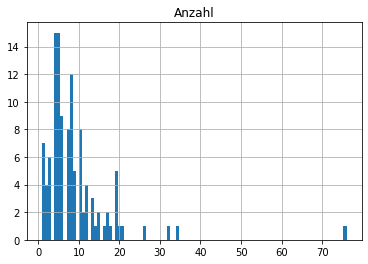

In [99]:
stücke_anzahl.hist(bins=100)

plt.savefig('./img/stuecke_anzahl_histogram.png')

In [100]:
stücke_anzahl.to_csv('./csv/02_stuecke_anzahl.csv')

In [101]:
stuecke_vs_anzahl = df[['Titel', 'Anzahl']]

In [102]:
stuecke_vs_anzahl = stuecke_vs_anzahl.pivot_table(index='Titel',aggfunc=['count', 'sum'])

In [138]:
stuecke_vs_anzahl.sort_values([('sum', 'Anzahl')], ascending=False).head(10)

,count,sum
,Anzahl,Anzahl
Titel,,
Die Zauberflöte,7,76
Hänsel und Gretel,6,34
La Traviata,3,32
Das Land des Lächelns,2,26
Rusalka,3,21
Roméo et Juliette,2,20
La Grande-Duchesse de Géroldstein,2,19
Die Walküre,2,19


In [177]:
IFrame('//datawrapper.dwcdn.net/azwpu/4/', width='320', height='2752')

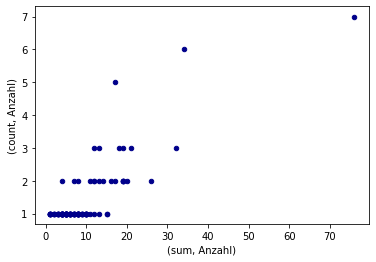

In [104]:
stuecke_vs_anzahl.plot.scatter(x=('sum', 'Anzahl'), y=('count', 'Anzahl'), c='DarkBlue')
plt.savefig('./img/stuecke_vs_anzahl_scatter.png')

In [105]:
stuecke_vs_anzahl.to_csv('./csv/03_stuecke_vs_anzahl.csv')

## Stücke

In [139]:
stücke = df[['Titel', 'Anzahl']]

Stücke nach Titel gezählt: An wie vielen verschiedenen Häusern wurde die Zauberflöte gespielt?

In [140]:
stücke_count = pd.pivot_table(stücke, index=['Titel'], aggfunc='count').sort_values('Anzahl', ascending=False).head(7)
stücke_count

,Anzahl
Titel,
Die Zauberflöte,7
Hänsel und Gretel,6
Tosca,5
La Traviata,3
Nabucco,3
Don Giovanni,3
Otello,3


In [141]:
stücke_count = stücke_count.sort_values('Anzahl')

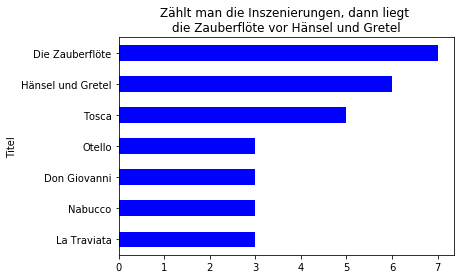

In [142]:
stücke_count.plot(kind='barh', 
                 title='Zählt man die Inszenierungen, dann liegt \ndie Zauberflöte vor Hänsel und Gretel',
                 color='blue',
                  legend=None
                 )

In [143]:
plt.savefig('./img/stücke_count.png')

<Figure size 432x288 with 0 Axes>

Wo überall wurde die Zauberflöte gespielt? 

In [127]:
df.sample()

,Spielstätte,Ort,Titel,Anzahl,Komponist,Komponist_ber,Geburtsort,Geschlecht,Geburtsjahr,Alter,Sterbedatum,Verstorben,Art,Bemerkung
135,"Musiktheater im Revier, Gelsenkirchen",Gelsenkirchen,Schwanda der Dudelsackpfeifer,4,Jaromír Weinberger,Jaromír Weinberger,Prag,männlich,1896,123,1967,Tot,premieren,NaN


In [128]:
zauberflöte = df[df.Titel == 'Die Zauberflöte']

In [129]:
zauberflöte.groupby('Spielstätte').sum()

,Anzahl,Geburtsjahr,Alter,Sterbedatum
Spielstätte,,,,
Deutsche Oper am Rhein,34,3512,526,3582
Oper Köln,15,1756,263,1791
Theater Bielefeld,4,1756,263,1791
Theater Krefeld Mönchengladbach,12,1756,263,1791
Theater und Philharmoie Essen,5,1756,263,1791
Theater/Oper/Schauspiel Bonn,6,1756,263,1791


In [130]:
zauberflöte.columns

Index(['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsjahr', 'Alter', 'Sterbedatum',
       'Verstorben', 'Art', 'Bemerkung'],
      dtype='object')

In [131]:
zauberflöte = zauberflöte[['Spielstätte', 'Ort', 'Anzahl']]

In [132]:
zauerflöte = zauberflöte.groupby('Ort').sum()

In [144]:
zauberflöte

,Spielstätte,Ort,Anzahl
38,Oper Köln,Köln,15
39,Deutsche Oper am Rhein,Düsseldorf/Duisburg,21
40,Theater Bielefeld,Bielefeld,4
41,Theater/Oper/Schauspiel Bonn,Bonn,6
42,Deutsche Oper am Rhein,Düsseldorf/Duisburg,13
43,Theater und Philharmoie Essen,Essen,5
44,Theater Krefeld Mönchengladbach,Krefeld/Mönchengladbach,12


In [133]:
zauberflöte.to_clipboard('./csv/03_zauberfloete.csv', sep=',', encoding='utf-8')

In [148]:
IFrame('//datawrapper.dwcdn.net/rAI3d/13/', width='400', height='350')

#### Stücke und Orte

In [134]:
stücke_orte = df[['Ort', 'Titel', 'Anzahl']]

In [135]:
# Wo wurde welches Stück am meisten gespielt? 
stücke_orte.sort_values('Anzahl', ascending=False).head()

,Ort,Titel,Anzahl
39,Düsseldorf/Duisburg,Die Zauberflöte,21
36,Köln,Die Walküre,17
16,Dortmund,Das Land des Lächelns,16
38,Köln,Die Zauberflöte,15
74,Köln,Im weißen Rössel,15


### Komponisten

#### Lebensdaten der Komponisten

Die Grafik zeigt die Lebensdaten der 66 Komponist*innen auf einen Blick. 

In [117]:
df.columns

Index(['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsjahr', 'Alter', 'Sterbedatum',
       'Verstorben', 'Art', 'Bemerkung', 'Zauberflöte'],
      dtype='object')

In [118]:
lebensdaten = df[['Komponist_ber', 'Geburtsjahr', 'Sterbedatum']]

In [119]:
lebensdaten = lebensdaten.drop_duplicates()

In [120]:
lebensdaten.Sterbedatum = lebensdaten.Sterbedatum.apply(lambda x: 2019 if x== 0 else x)

In [121]:
lebensdaten = lebensdaten[lebensdaten.Geburtsjahr > 0]

In [122]:
lebensdaten.rename(columns={'Sterbedatum': 'Sterbejahr'}, inplace=True)

In [123]:
lebensdaten = lebensdaten.sort_values('Geburtsjahr')

In [124]:
lebensdaten["type"] = "range"

In [125]:
lebensdaten.sample()

,Komponist_ber,Geburtsjahr,Sterbejahr,type
3,Johann Christian Bach,1735,1782,range


In [127]:
lebensdaten.to_json('lebensdaten.json', orient='records')

#### Meistgespielte anhand Anzahl der Aufführungen

In [42]:
composers_count = pd.pivot_table(composers, index=['Komponist_ber'], aggfunc='sum').sort_values(by='Anzahl', ascending=False)

In [43]:
composers_count.head(10)

,Anzahl
Komponist_ber,
Giuseppe Verdi,143
Wolfgang Amadeus Mozart,118
Richard Wagner,68
Jacques Offenbach,59
Giacomo Puccini,43
Engelbert Humperdinck,42
Leonard Bernstein,32
Richard Strauss,30
Franz Lehár,29


In [63]:
composers_count.tail()

,Anzahl
Komponist_ber,
Frank Engel,1
Dirk Heidicke,1
Fons Merkies,1
Wilfried Hiller,1
Friedrich von Flotow,1


In [157]:
composers_age.Alter.max()

452

In [158]:
composers_age = composers_age.sort_values(by='Alter', ascending=False)

In [159]:
composers_age = composers_age.drop_duplicates()

In [160]:
composers_age.head()

,Komponist_ber,Alter
11,Claudio Monteverdi,452
152,Henry Purcell,360
158,Georg Friedrich Händel,334
3,Johann Christian Bach,284
88,Antonio Salieri,269


In [161]:
composers_age.tail()

,Komponist_ber,Alter
134,Anno Schreier,40
150,Moritz Anthes,39
79,Nuñez Hierro,39
58,Leonard Evers,34
114,Dirk Heidicke,0


In [178]:
df.sample()

,Spielstätte,Ort,Titel,Anzahl,Komponist,Komponist_ber,Geburtsort,Geschlecht,Geburtsjahr,Alter,Sterbedatum,Verstorben,Art,Bemerkung
20,Theater und Philharmoie Essen,Essen,Der Freischütz,10,Carl Maria von Weber,Carl Maria von Weber,Eutin,männlich,1786,233,1826,Tot,premieren,NaN


### Anteil vor 1919 geboren

In [287]:
junge = df[['Komponist_ber', 'Geburtsjahr', 'Alter', 'Verstorben']]

In [288]:
junge = junge.drop_duplicates()

In [289]:
junge.sample()

,Komponist_ber,Geburtsjahr,Alter,Verstorben
81,Giacomo Puccini,1858,161,Tot


In [290]:
junge.shape

(66, 4)

In [291]:
junge_1919 = junge[junge.Geburtsjahr > 1919]

In [292]:
junge_1900.shape

(21, 4)

In [293]:
junge.columns

Index(['Komponist_ber', 'Geburtsjahr', 'Alter', 'Verstorben'], dtype='object')

In [294]:
junge = junge[['Komponist_ber', 'Geburtsjahr']]

In [295]:
junge['Jung'] = junge.Geburtsjahr.apply(lambda x: 'Nach 1919' if x > 1919 else 'Vor 1919')

In [296]:
junge = junge.groupby('Jung').count()

In [297]:
junge

,Komponist_ber,Geburtsjahr
Jung,,
Nach 1919,21,21
Vor 1919,45,45


In [298]:
junge.to_csv('csv/vor1900.csv')

In [299]:
junge.columns

Index(['Komponist_ber', 'Geburtsjahr'], dtype='object')

In [300]:
# Prozentsatz berechnen
21/66*100

31.818181818181817

In [301]:
# Prozentsatz berechnen
45/66*100

68.18181818181817

In [304]:
junge_anzahl.shape

(24, 14)

In [311]:
df['vor 1919'] = df.Geburtsjahr.apply(lambda x: 'Nach 1919' if x > 1919 else 'Vor 1919')

In [312]:
df.groupby('vor 1919').agg(sum)

,Anzahl,Geburtsjahr,Alter,Sterbedatum
vor 1919,,,,
Nach 1919,120,46962,1494,10074
Vor 1919,904,244202,26344,253107


In [313]:
120/1024*100

11.71875

In [314]:
904/1024*100

88.28125

### Männer und Frauen  

In [317]:
df.columns

Index(['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsjahr', 'Alter', 'Sterbedatum',
       'Verstorben', 'Art', 'Bemerkung', 'vor 1919'],
      dtype='object')

### Häuser 

In [196]:
df.Ort.value_counts()

Düsseldorf/Duisburg        38
Köln                       20
Essen                      16
Bonn                       13
Krefeld/Mönchengladbach    12
Gelsenkirchen              12
Wuppertal                  10
Dortmund                    9
Hagen                       9
Aachen                      8
Bielefeld                   7
Herford                     4
Minden                      1
Name: Ort, dtype: int64

In [44]:
df.groupby('Komponist_ber').count().sort_values(by='Spielstätte', ascending=False).head(10)

,Geburtsort,Sterbedatum,Geschlecht,Spielstätte,Veranstalter,Ort,Art,Titel,Anzahl,Geburtsjahr,Alter,Verstorben,Oper,Bemerkung
Komponist_ber,,,,,,,,,,,,,,
Giuseppe Verdi,22,22,22,22,22,22,22,22,22,22,22,22,22,0
Wolfgang Amadeus Mozart,15,15,15,15,15,15,15,15,15,15,15,15,15,1
Richard Wagner,11,11,11,11,11,11,11,11,11,11,11,11,11,0
Giacomo Puccini,8,9,8,9,9,9,9,9,9,9,9,9,9,1
Engelbert Humperdinck,7,7,7,7,7,7,7,7,7,7,7,7,7,0
Jacques Offenbach,6,7,6,7,7,7,7,7,7,7,7,7,7,1
Richard Strauss,5,5,5,5,5,5,5,5,5,5,5,5,5,0
Franz Lehár,4,4,4,4,4,4,4,4,4,4,4,4,4,1
Carl Maria von Weber,4,4,4,4,4,4,4,4,4,4,4,4,4,0


In [353]:
 df[df.Geschlecht == 'weiblich']

,Spielstätte,Ort,Titel,Anzahl,Komponist,Komponist_ber,Geburtsort,Geschlecht,Geburtsjahr,Alter,Sterbedatum,Verstorben,Art,Bemerkung
117,Wuppertaler Bühnen,Wuppertal,Kleines Stück Himmel,8,NaN,Nuñez Hierro,Cádiz,weiblich,1980,39,0,lebt,premieren,NaN


In [363]:
geburtsorte = df[['Komponist_ber', 'Geburtsort']]

In [366]:
geburtsorte = geburtsorte.drop_duplicates()

In [367]:
geburtsorte.to_csv('geburtsorte.csv')

### Spielstätten

In [222]:
df.columns

Index(['Spielstätte', 'Ort', 'Titel', 'Anzahl', 'Komponist', 'Komponist_ber',
       'Geburtsort', 'Geschlecht', 'Geburtsjahr', 'Alter', 'Sterbedatum',
       'Verstorben', 'Art', 'Bemerkung'],
      dtype='object')

In [227]:
df.groupby('Spielstätte').sum().sort_values(by='Anzahl', ascending= False)

,Anzahl,Geburtsjahr,Alter,Sterbedatum
Spielstätte,,,,
Deutsche Oper am Rhein,218,69743,6979,64192
Oper Köln,150,37128,3252,34424
Theater/Oper/Schauspiel Bonn,105,23867,2380,20654
Theater Krefeld Mönchengladbach,82,22228,2000,18987
"Musiktheater im Revier, Gelsenkirchen",75,22528,1700,19180
Theater Hagen,74,15975,2196,16599
Theater und Philharmoie Essen,74,29180,3124,28181
Theater Aachen,68,14548,1604,15134
"Oper, Ballett und Junge Oper Dortmund",67,17062,1109,11649


69187.20497623291